
##  Iowa House Price (*Multicollinearity check for numerical columns*)   



In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns   

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge   
from sklearn.linear_model import ElasticNet 

pd.set_option('display.max_columns', 900)   
pd.set_option('display.max_rows', 900)

%matplotlib inline
  



In [2]:

df_train = pd.read_csv('house_train.csv')      # the original data set  

df_train.head(10)      

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [3]:

#df_train.info()   


In [4]:
''' impute numerical nulls '''

df_train['LotFrontage'] = df_train['LotFrontage'].mask(df_train['LotFrontage'].isnull(), np.random.uniform(df_train['LotFrontage'].min(), df_train['LotFrontage'].max(), size = df_train['LotFrontage'].shape)) 

df_train['GarageYrBlt'] = df_train['GarageYrBlt'].mask(df_train['GarageYrBlt'].isnull(), np.random.uniform(df_train['GarageYrBlt'].min(), df_train['GarageYrBlt'].max(), size = df_train['GarageYrBlt'].shape))     

df_train['MasVnrArea'] = df_train['MasVnrArea'].mask(df_train['MasVnrArea'].isnull(), np.random.uniform(df_train['MasVnrArea'].min(), df_train['MasVnrArea'].max(), size = df_train['MasVnrArea'].shape))   





### 1. Base model 


In [5]:
''' define numerical columns '''

df_num = df_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
             'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
             'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
             'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 
             'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 
             'YrSold', 'SalePrice']] 

df_num



,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [6]:
df_num.shape   

(1460, 37)

In [7]:
''' check for nulls '''

#df_num.isnull().sum().sort_values() 

' check for nulls '

In [8]:
''' define X and y; train_test_split '''

# create X and y      
X = df_num.drop(['SalePrice'], axis = 1)
y = df_num['SalePrice']  

# train_test_split   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)  



In [9]:
''' fit MLR model ''' 

ols = LinearRegression()
ols.fit(X_train, y_train)
print("R^2 for train set: %f" %ols.score(X_train, y_train))

print('-'*50)

print("R^2 for test set: %f" %ols.score(X_test, y_test))   



R^2 for train set: 0.798806
--------------------------------------------------
R^2 for test set: 0.855404


In [10]:
''' checking for multicollinearity '''

# numerical features do not contain 'SalePrice'
continuous_features = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
                       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
                       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
                       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
                       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

scores = {}

ols2 = LinearRegression()
from sklearn.metrics import r2_score

for feature_name in continuous_features:
                df2     = df_num.copy()
                feature = df2[feature_name].copy()
                df2.drop(feature_name, axis=1, inplace=True)
                ols2.fit(df2, feature)
                scores[feature_name] = ols2.score(df2, feature)   



[]

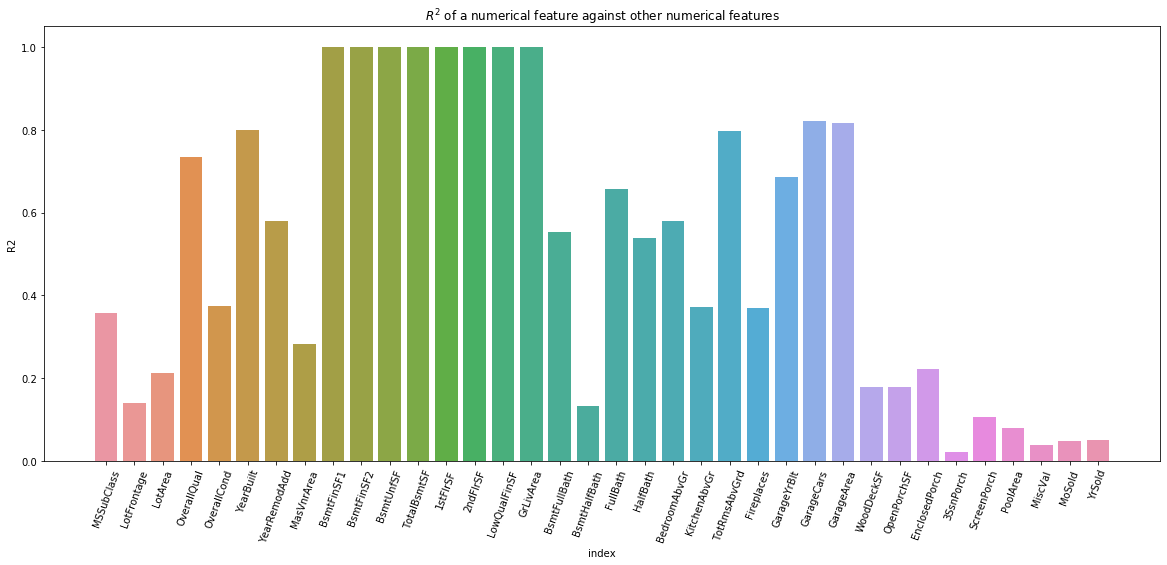

In [11]:
''' plot multicollinearity '''

plt.figure(figsize = (20, 8))
ax = sns.barplot(x = 'index', y= 'R2', data = pd.DataFrame(scores, index = ['R2']).T.reset_index())
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)  

plt.title('$R^2$ of a numerical feature against other numerical features')  
plt.plot() 




In [12]:
''' coefficients for all numerical features '''

df_num_1 = df_num.drop(['SalePrice'], axis = 1)   # remove the 'SalePrice' column 

colnames = df_num_1.columns
result = pd.DataFrame(ols.coef_).transpose()
result.columns = colnames.tolist()
result['intercept'] = ols.intercept_ 
result = result.transpose()
result.columns = ['coefficient']
result   


,coefficient
MSSubClass,-1.785233e+02
LotFrontage,-1.716838e+01
LotArea,4.836708e-01
OverallQual,1.776837e+04
OverallCond,4.590465e+03
YearBuilt,2.813318e+02
YearRemodAdd,1.561996e+02
MasVnrArea,2.501030e+01
BsmtFinSF1,7.756939e+00
BsmtFinSF2,-4.186986e+00



### 2. Drop selected dependent features from the base model  


In [13]:

df_train = pd.read_csv('house_train.csv')      # the original data set  
df_train 


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [14]:
''' impute numerical nulls '''

df_train['LotFrontage'] = df_train['LotFrontage'].mask(df_train['LotFrontage'].isnull(), np.random.uniform(df_train['LotFrontage'].min(), df_train['LotFrontage'].max(), size = df_train['LotFrontage'].shape)) 

df_train['GarageYrBlt'] = df_train['GarageYrBlt'].mask(df_train['GarageYrBlt'].isnull(), np.random.uniform(df_train['GarageYrBlt'].min(), df_train['GarageYrBlt'].max(), size = df_train['GarageYrBlt'].shape))     

df_train['MasVnrArea'] = df_train['MasVnrArea'].mask(df_train['MasVnrArea'].isnull(), np.random.uniform(df_train['MasVnrArea'].min(), df_train['MasVnrArea'].max(), size = df_train['MasVnrArea'].shape))   



In [15]:
''' define numerical columns ''' 

# excluded features: 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'YearBuilt', 'GarageCars', 'GarageYrBlt',  'TotRmsAbvGrd', 
df_num = df_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 
             'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
             'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 
             'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 
             'YrSold', 'SalePrice']] 

df_num  


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,196.0,1,0,2,1,3,1,0,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,0.0,0,1,2,0,3,1,1,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2002,162.0,1,0,2,1,3,1,1,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1970,0.0,1,0,1,0,3,1,1,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,350.0,1,0,2,1,4,1,1,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,2000,0.0,0,0,2,1,3,1,1,460,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1988,119.0,1,0,2,0,3,1,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,2006,0.0,0,0,2,0,4,1,2,252,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1996,0.0,1,0,1,0,2,1,0,240,366,0,112,0,0,0,0,4,2010,142125


In [16]:
df_num.shape   

(1460, 25)

In [17]:
''' define X and y; train_test_split '''

# create X and y      
X = df_num.drop(['SalePrice'], axis = 1)
y = df_num['SalePrice']  

# train_test_split   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)   


In [18]:
''' fit MLR model ''' 

ols = LinearRegression()
ols.fit(X_train, y_train)
print("R^2 for train set: %f" %ols.score(X_train, y_train))

print('-'*50)

print("R^2 for test set: %f" %ols.score(X_test, y_test))   


R^2 for train set: 0.766489
--------------------------------------------------
R^2 for test set: 0.767523


In [19]:
''' checking for multicollinearity '''

# numerical features do not contain 'SalePrice'  
# excluded features: 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageYrBlt',  'TotRmsAbvGrd',  'YearBuilt',
continuous_features = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
                       'YearRemodAdd', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 
                       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 
                       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
                       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

scores = {}

ols2 = LinearRegression()
from sklearn.metrics import r2_score

for feature_name in continuous_features:
                df2     = df_num.copy()
                feature = df2[feature_name].copy()
                df2.drop(feature_name, axis=1, inplace=True)
                ols2.fit(df2, feature)
                scores[feature_name] = ols2.score(df2, feature)   



[]

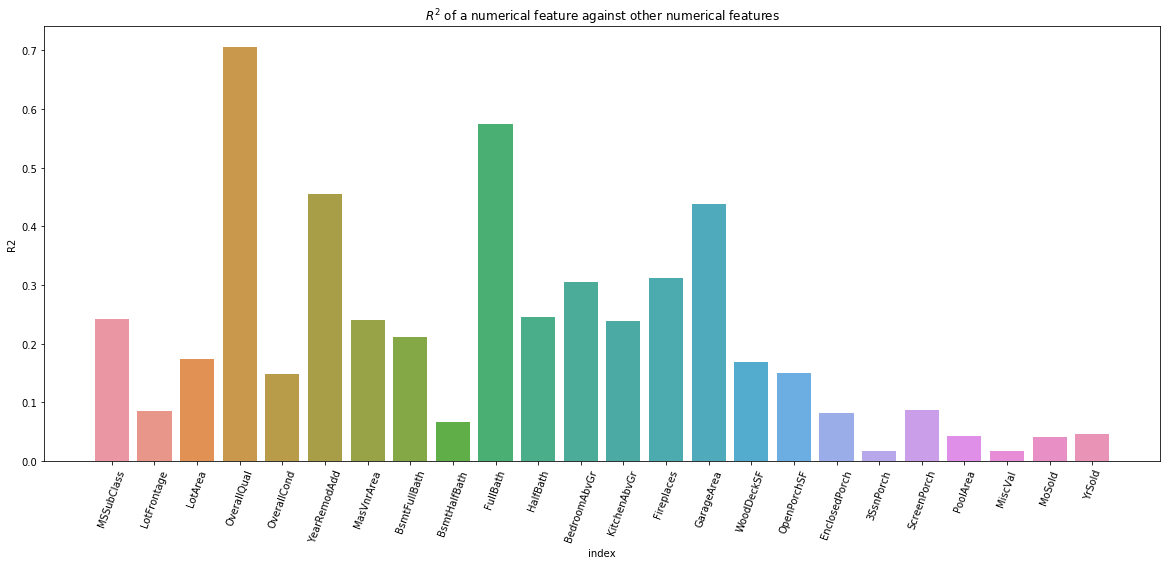

In [20]:
''' plot multicollinearity '''

plt.figure(figsize = (20, 8))
ax = sns.barplot(x = 'index', y= 'R2', data = pd.DataFrame(scores, index = ['R2']).T.reset_index())
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)  

plt.title('$R^2$ of a numerical feature against other numerical features')  
plt.plot() 



In [21]:
''' coefficients for all numerical features '''

df_num_1 = df_num.drop(['SalePrice'], axis = 1)   # remove the 'SalePrice' column 

colnames = df_num_1.columns
result = pd.DataFrame(ols.coef_).transpose()
result.columns = colnames.tolist()
result['intercept'] = ols.intercept_ 
result = result.transpose()
result.columns = ['coefficient']
result   


,coefficient
MSSubClass,-203.173080
LotFrontage,5.745393
LotArea,0.553154
OverallQual,25372.075507
OverallCond,1911.547217
YearRemodAdd,261.275442
MasVnrArea,45.642621
BsmtFullBath,16426.923542
BsmtHalfBath,5002.764909
FullBath,21937.067786


###  3. Statsmodels Package with coefficient significance 

In [22]:
# removed 'GarageCars','GarageYrBlt', 'TotRmsAbvGrd', 'YearBuilt',
features = df_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 
             'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
             'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 
             'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 
             'YrSold']]      

target = df_train['SalePrice'] 


In [23]:
import statsmodels.api as sm

x = sm.add_constant(features)  # specifying to calculate the intercept  

model = sm.OLS(target, x)
results = model.fit()  

print(results.summary())   


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     197.7
Date:                Sat, 30 May 2020   Prob (F-statistic):               0.00
Time:                        13:49:23   Log-Likelihood:                -17478.
No. Observations:                1460   AIC:                         3.501e+04
Df Residuals:                    1435   BIC:                         3.514e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.625e+06   1.56e+06      1.040

In [24]:
''' calculate the significant coefficients (p-values < 0.05) '''   

pValues = results.pvalues
print('The significant coefficients')
pValues[pValues < 0.05]   


The significant coefficients


MSSubClass      3.865845e-13
LotArea         1.025765e-08
OverallQual     2.328960e-92
OverallCond     3.912213e-02
YearRemodAdd    2.767062e-05
MasVnrArea      6.454044e-13
BsmtFullBath    1.477535e-15
FullBath        1.377923e-15
HalfBath        2.252204e-06
Fireplaces      7.827451e-11
GarageArea      5.686570e-18
WoodDeckSF      8.104017e-07
ScreenPorch     9.562901e-04
dtype: float64

In [25]:
''' calculate the insignificant coefficients (p-values >= 0.05) '''    

print('The insignificant coefficients')
pValues[pValues >= 0.05]   


The insignificant coefficients


const            0.298651
LotFrontage      0.975752
BsmtHalfBath     0.292638
BedroomAbvGr     0.212993
KitchenAbvGr     0.477078
OpenPorchSF      0.122345
EnclosedPorch    0.610245
3SsnPorch        0.311717
PoolArea         0.444186
MiscVal          0.873121
MoSold           0.420912
YrSold           0.149348
dtype: float64